In [1]:
from data import gdf
import leafmap.foliumap as leafmap
# import geopandas as gpd


In [2]:
# get all geometrys within the bounds
# gdf.cx[-118.94:-118.85, 35.27:35.32]
# gdf.cx[-118.94:-118.85, 35.27:35.32].plot()


In [3]:
print(gdf.shape)

(582, 4)


(430, 4)


<Axes: >

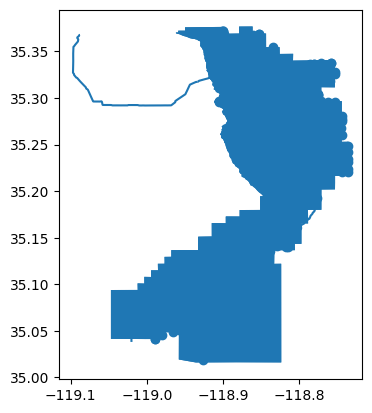

In [21]:
bounds = [
	# left
	-118.93,
	# right
	-118.80,
	# bottom
	35.25,
	# top
	35.35,
	]
# gdf.clip(bounds)
clip = gdf.clip_by_rect(*bounds)
filtered_gdf = gdf.iloc[clip.loc[~clip.geometry.is_empty].index]
print(filtered_gdf.shape)
filtered_gdf.plot()


In [5]:
# def filter_bbox(gdf,bounds):
# 	# clip = gdf.clip_by_rect(*bounds)
# 	clip = gdf.clip_by_rect(
# 		xmin=bounds[0],
# 		xmax=bounds[1],
# 		ymin=bounds[2],
# 		ymax=bounds[3],
# 	)
# 	# print(clip.shape)
# 	print(clip.loc[~clip.geometry.is_empty])
	
	
# 	filtered_gdf = gdf.iloc[clip.loc[~clip.geometry.is_empty].index]
# 	return filtered_gdf

# bounds = [
# 	# left
# 	-118.93,
# 	# right
# 	-118.80,
# 	# bottom
# 	35.25,
# 	# top
# 	35.35,
# 	]

# filtered_gdf = filter_bbox(gdf,bounds)
# print(filtered_gdf.shape)
# # filtered_gdf.head()
# filtered_gdf.plot()


In [20]:
import folium

def make_map(filtered_gdf):
	lines = ['Proposed Pipeline', 'AEWSD North Canal', 'FFPPP Discharge Pipeline',]
	filled_polygons = ['Frick Unit Service Area']
	hollow_polygons = ['District Boundary']
	points = ['Proposed Turnout']
		
	m = leafmap.Map(
		tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
		attr="Esri",
		
		min_zoom=3,
		# max_zoom=12,

		min_lat=bounds[2],
		max_lat=bounds[3],
		min_lon=bounds[0],
		max_lon=bounds[1],
		max_bounds=True,
		
		# zoom_control=False,
		draw_control=False,
		search_control=False,

	)
	# ll_bounds = [
	# 	[bounds[2],bounds[0]],
	# 	[bounds[3],bounds[1]],
	# 	]

	for layer in hollow_polygons:
		gdf = filtered_gdf[filtered_gdf['layer']==layer]
		color = gdf['color'].unique()[0]
		m.add_gdf(
			gdf,
			layer_name=layer,
			style={
				'color':color,
				'fillColor':"none",
				},
			)

	for layer in filled_polygons:
		gdf = filtered_gdf[filtered_gdf['layer']==layer]
		color = gdf['color'].unique()[0]
		m.add_gdf(
			gdf,
			layer_name=layer,
			style={
				# 'color':color,
				'color':"none",
				'fillColor':color,
				},
			zoom_to_layer=True,
			)

	for layer in lines:
		gdf = filtered_gdf[filtered_gdf['layer']==layer]
		color = gdf['color'].unique()[0]
		m.add_gdf(gdf, layer_name=layer, style={'color': color})

	for layer in points:
		gdf = filtered_gdf[filtered_gdf['layer']==layer]
		color = gdf['color'].unique()[0]
		for i,y in gdf.iterrows():
			folium.Circle(
				radius=30,
				location=[y.geometry.y,y.geometry.x],
				color=y['color'],
				fill=True,
				tooltip=[y["label"]],
				).add_to(m)
	m.add_legend(
		title="Legend",
		legend_dict={
			"Proposed Pipeline": "#ff0000",
			"AEWSD North Canal": "#0000ff",
			"FFPPP Discharge Pipeline": "#00ff00",
			"Frick Unit Service Area": "#ffff00",
			"District Boundary": "#000000",
			"Proposed Turnout": "#ff00ff",
		}
	)


	# m.fit_bounds(bounds=ll_bounds,max_zoom=12)
	# m.set_max_bounds(ll_bounds)
	return m
# filtered_gdf = gdf.clip(bounds)
# filtered_gdf = gdf.clip(bounds)
m = make_map(filtered_gdf)
m

In [16]:
gdf.clip_by_rect(*bounds)

0      LINESTRING (-118.88750 35.32172, -118.90981 35...
1      LINESTRING (-118.88752 35.31080, -118.90544 35...
2      LINESTRING (-118.88748 35.30355, -118.88297 35...
3      LINESTRING (-118.88748 35.29623, -118.90537 35...
4      LINESTRING (-118.86956 35.28903, -118.86963 35...
                             ...                        
553                          POINT (-118.87886 35.25655)
554                          POINT (-118.88294 35.30350)
555                          POINT (-118.88743 35.29265)
556                          POINT (-118.87870 35.27143)
557                          POINT (-118.88749 35.31072)
Length: 582, dtype: geometry

In [12]:
m.to_html("map.html")